In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")


In [7]:
pd.set_option("display.max_columns",100)

In [8]:
df = pd.read_csv("car_sales.csv",index_col=0)
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [ ]:
# fill - median
# dropped (Rear.seat.room)
# filled with - 0

In [31]:
df.isnull().sum()

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [32]:
df[df["Luggage.room"].isnull()]

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
16,Chevrolet,Lumina_APV,Van,14.7,16.3,18.0,18,23,None,Front,6,3.8,170,4800,1690,No,20.0,7,178,110,74,44,30.5,NaN,3715,USA,Chevrolet Lumina_APV
17,Chevrolet,Astro,Van,14.7,16.6,18.6,15,20,None,4WD,6,4.3,165,4000,1790,No,27.0,8,194,111,78,42,33.5,NaN,4025,USA,Chevrolet Astro
19,Chevrolet,Corvette,Sporty,34.6,38.0,41.5,17,25,Driver only,Rear,8,5.7,300,5000,1450,Yes,20.0,2,179,96,74,43,NaN,NaN,3380,USA,Chevrolet Corvette
26,Dodge,Caravan,Van,13.6,19.0,24.4,17,21,Driver only,4WD,6,3.0,142,5000,1970,No,20.0,7,175,112,72,42,26.5,NaN,3705,USA,Dodge Caravan
36,Ford,Aerostar,Van,14.5,19.9,25.3,15,20,Driver only,4WD,6,3.0,145,4800,2080,Yes,21.0,7,176,119,72,45,30.0,NaN,3735,USA,Ford Aerostar
56,Mazda,MPV,Van,16.6,19.1,21.7,18,24,None,4WD,6,3.0,155,5000,2240,No,19.6,7,190,110,72,39,27.5,NaN,3735,non-USA,Mazda MPV
57,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,rotary,1.3,255,6500,2325,Yes,20.0,2,169,96,69,37,NaN,NaN,2895,non-USA,Mazda RX-7
66,Nissan,Quest,Van,16.7,19.1,21.5,17,23,None,Front,6,3.0,151,4800,2065,No,20.0,7,190,112,74,41,27.0,NaN,4100,non-USA,Nissan Quest
70,Oldsmobile,Silhouette,Van,19.5,19.5,19.5,18,23,None,Front,6,3.8,170,4800,1690,No,20.0,7,194,110,74,44,30.5,NaN,3715,USA,Oldsmobile Silhouette
87,Toyota,Previa,Van,18.9,22.7,26.6,18,22,Driver only,4WD,4,2.4,138,5000,2515,Yes,19.8,7,187,113,71,41,35.0,NaN,3785,non-USA,Toyota Previa


In [33]:
df.fillna(0,inplace=True)

In [35]:
# check for assosciation b/w target and each independent varaiables
df["Passengers"] = df["Passengers"].astype("object")

In [36]:
# num vs num
num_cols = df.select_dtypes("number")
cat_cols = df.select_dtypes("object")

In [39]:
num_cols.head()

,Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
1,15.9,25,31,1.8,140,6300,2890,13.2,177,102,68,37,26.5,11.0,2705
2,33.9,18,25,3.2,200,5500,2335,18.0,195,115,71,38,30.0,15.0,3560
3,29.1,20,26,2.8,172,5500,2280,16.9,180,102,67,37,28.0,14.0,3375
4,37.7,19,26,2.8,172,5500,2535,21.1,193,106,70,37,31.0,17.0,3405
5,30.0,22,30,3.5,208,5700,2545,21.1,186,109,69,39,27.0,13.0,3640


In [38]:
num_cols.drop(["Min.Price","Max.Price"],axis=1, inplace=True)

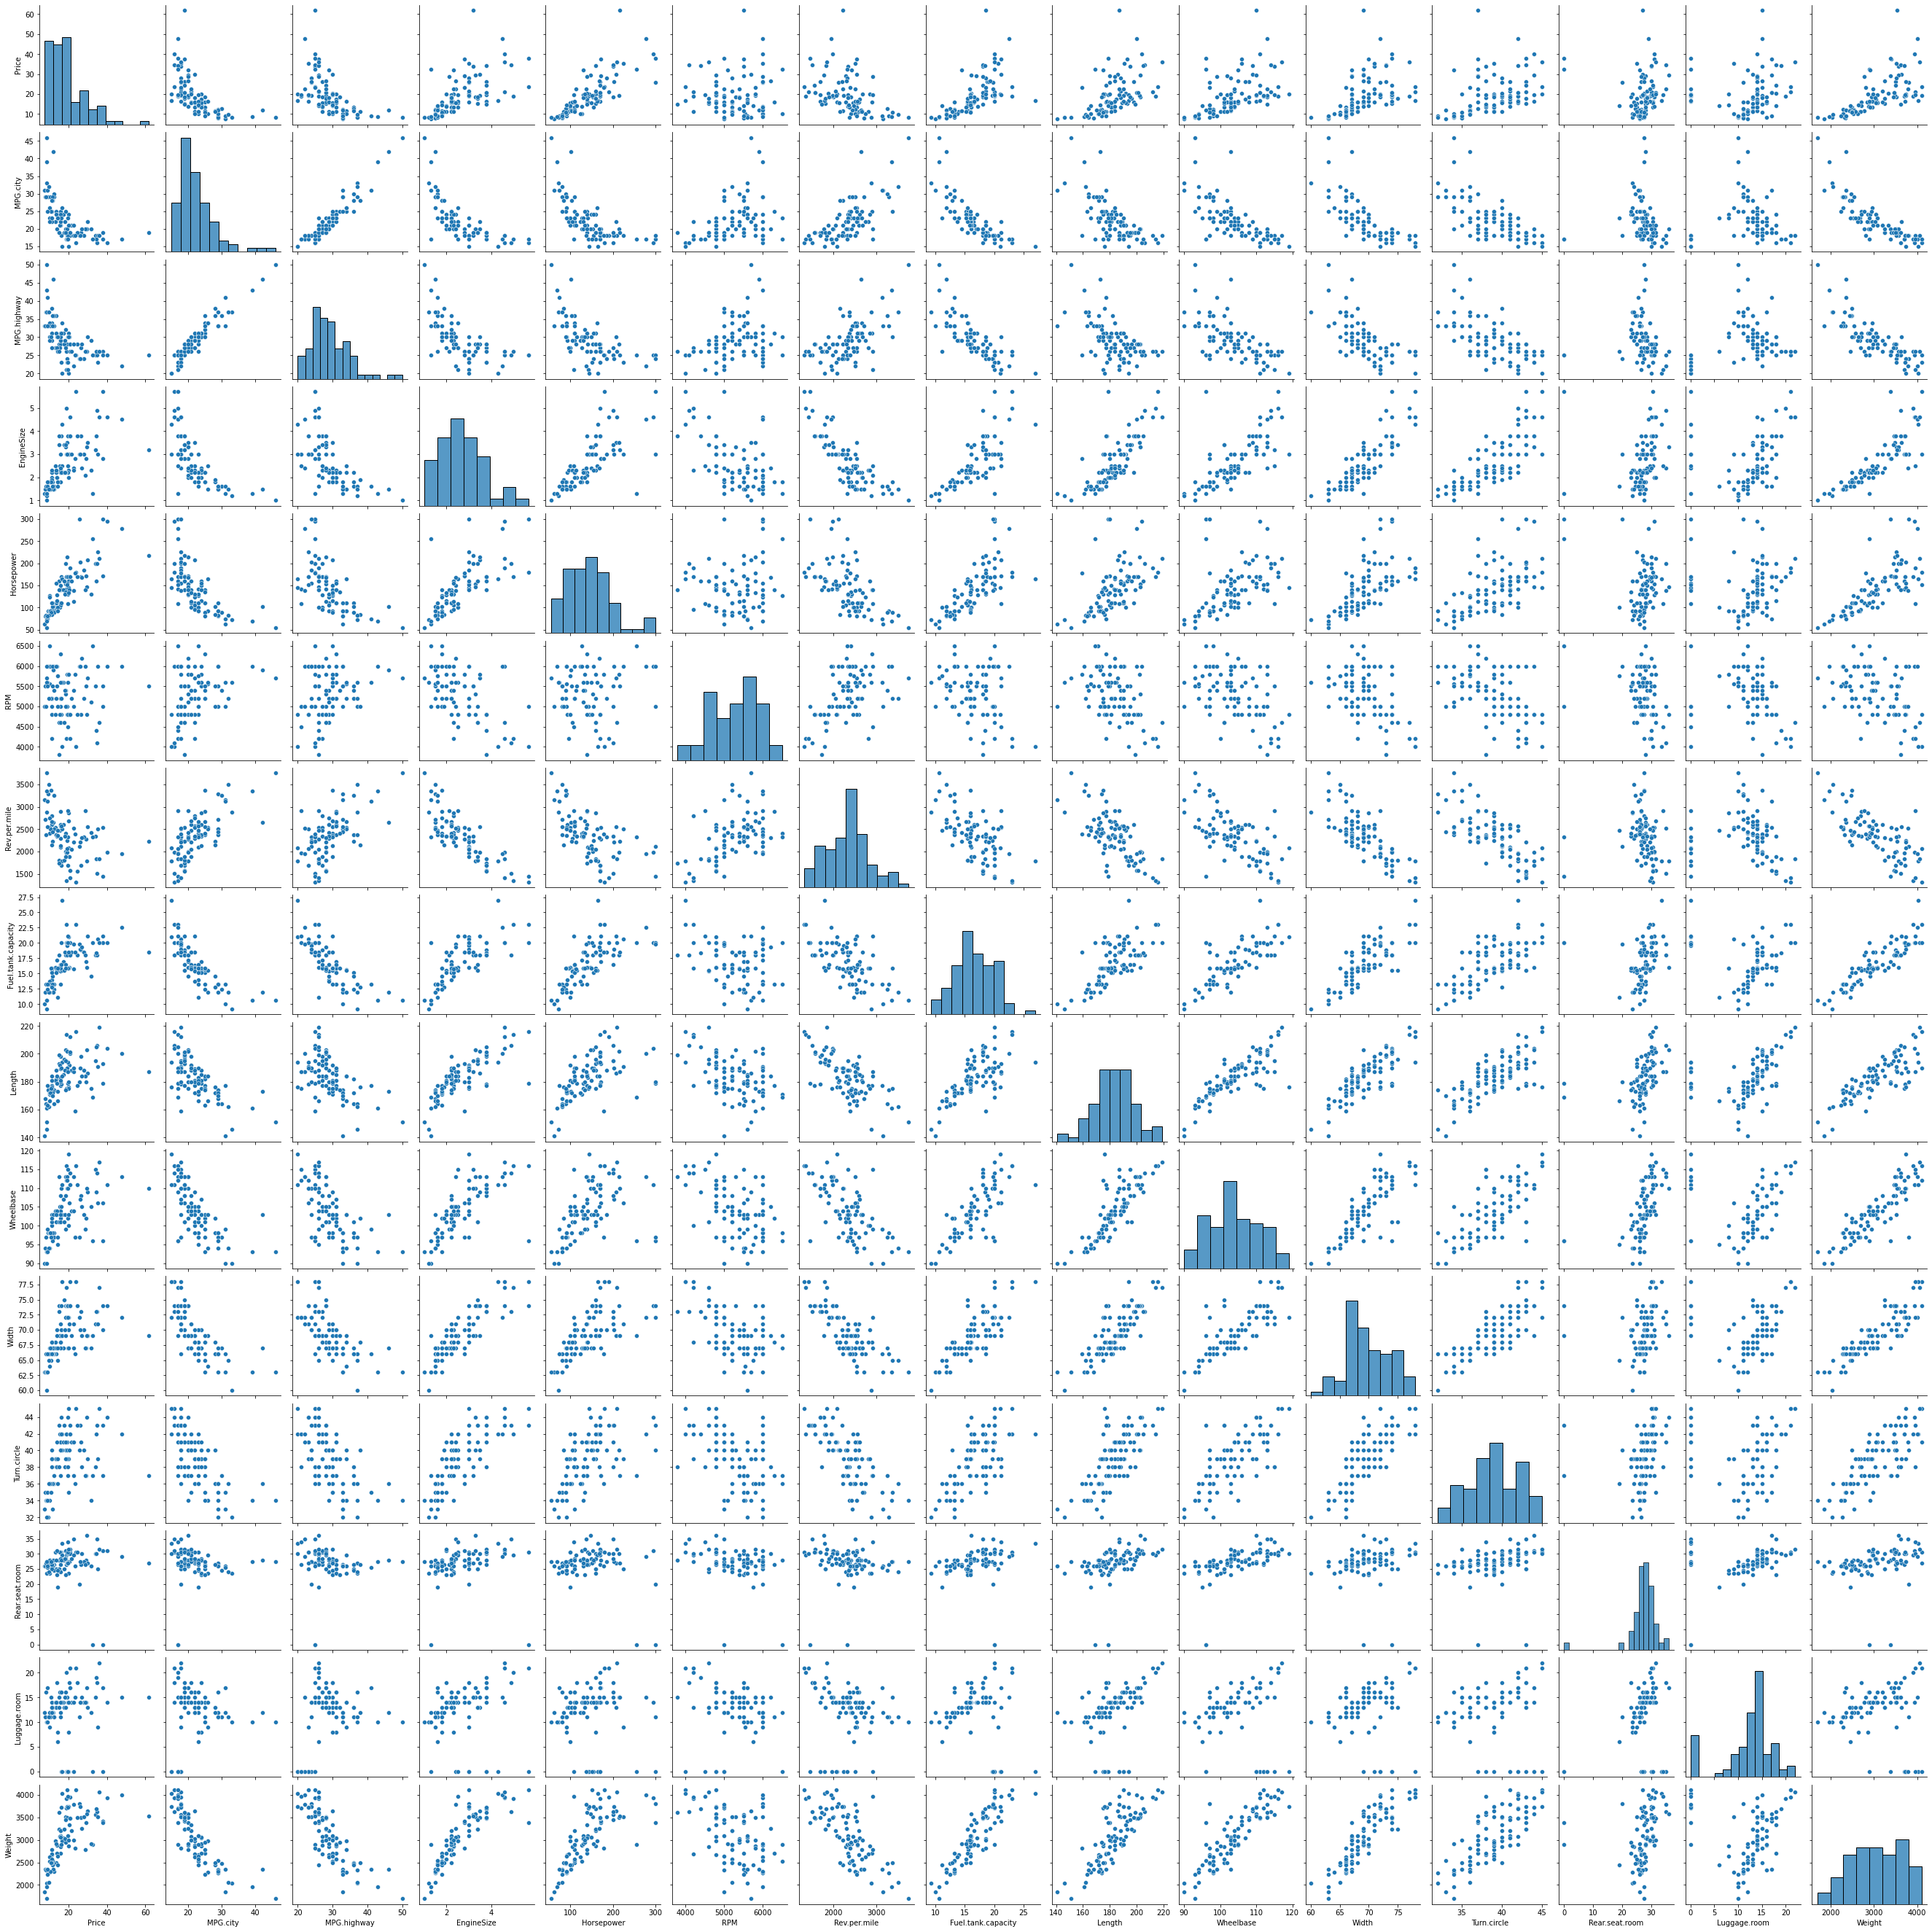

In [40]:
sns.pairplot(num_cols,corner=True)

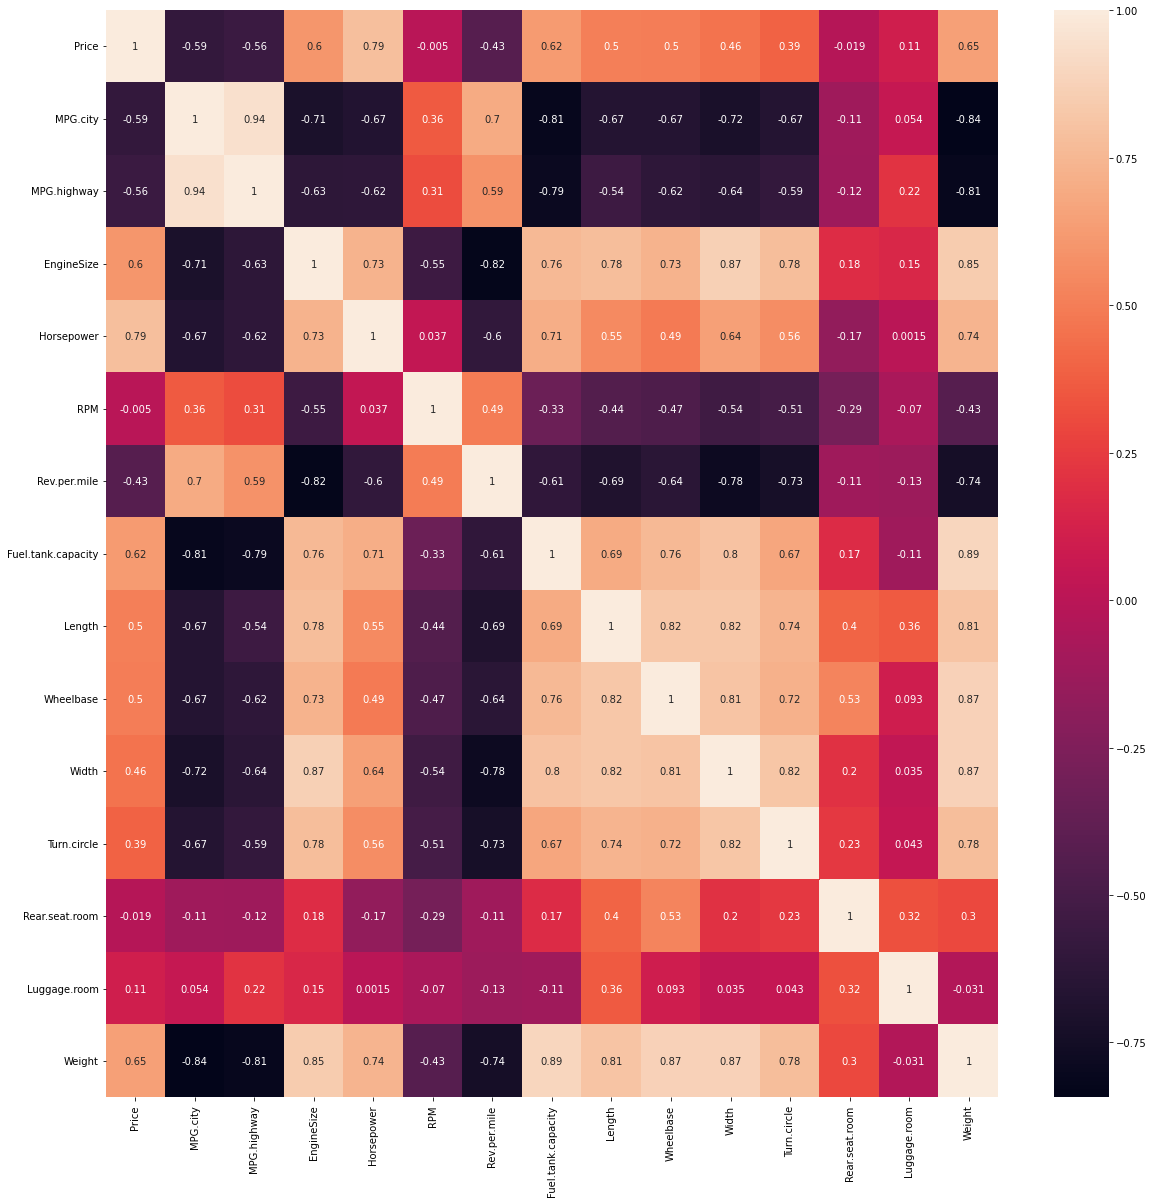

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(num_cols.corr(),annot=True)
plt.show()

In [43]:
cat_cols.drop(["Model","Make","Manufacturer"],axis=1,inplace=True)

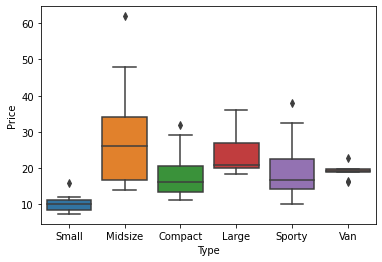

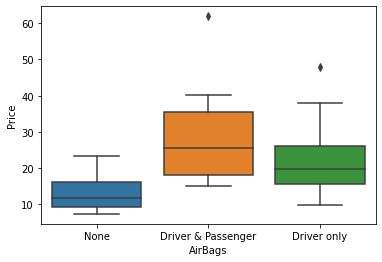

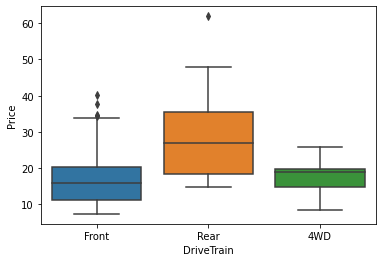

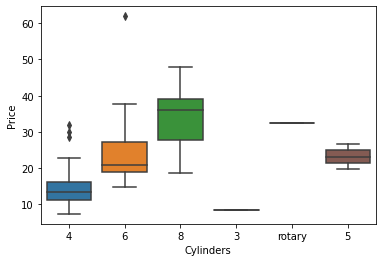

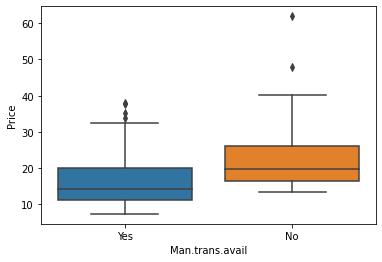

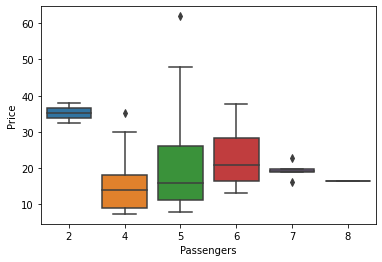

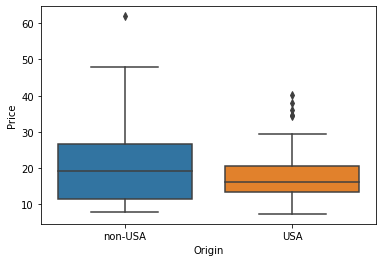

In [44]:
for c in cat_cols.columns:
    sns.boxplot(cat_cols[c], df["Price"])
    plt.show()

In [45]:
!pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable


In [46]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [47]:
num_cols

,Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
1,15.9,25,31,1.8,140,6300,2890,13.2,177,102,68,37,26.5,11.0,2705
2,33.9,18,25,3.2,200,5500,2335,18.0,195,115,71,38,30.0,15.0,3560
3,29.1,20,26,2.8,172,5500,2280,16.9,180,102,67,37,28.0,14.0,3375
4,37.7,19,26,2.8,172,5500,2535,21.1,193,106,70,37,31.0,17.0,3405
5,30.0,22,30,3.5,208,5700,2545,21.1,186,109,69,39,27.0,13.0,3640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,19.7,17,21,2.5,109,4500,2915,21.1,187,115,72,38,34.0,0.0,3960
90,20.0,21,30,2.0,134,5800,2685,18.5,180,103,67,35,31.5,14.0,2985
91,23.3,18,25,2.8,178,5800,2385,18.5,159,97,66,36,26.0,15.0,2810
92,22.7,21,28,2.3,114,5400,2215,15.8,190,104,67,37,29.5,14.0,2985


In [50]:
dumm_en = pd.get_dummies(cat_cols, drop_first=True)

In [51]:
sc_num_cols = num_cols.drop("Price",axis=1)
sc_num_cols

,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
1,25,31,1.8,140,6300,2890,13.2,177,102,68,37,26.5,11.0,2705
2,18,25,3.2,200,5500,2335,18.0,195,115,71,38,30.0,15.0,3560
3,20,26,2.8,172,5500,2280,16.9,180,102,67,37,28.0,14.0,3375
4,19,26,2.8,172,5500,2535,21.1,193,106,70,37,31.0,17.0,3405
5,22,30,3.5,208,5700,2545,21.1,186,109,69,39,27.0,13.0,3640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,17,21,2.5,109,4500,2915,21.1,187,115,72,38,34.0,0.0,3960
90,21,30,2.0,134,5800,2685,18.5,180,103,67,35,31.5,14.0,2985
91,18,25,2.8,178,5800,2385,18.5,159,97,66,36,26.0,15.0,2810
92,21,28,2.3,114,5400,2215,15.8,190,104,67,37,29.5,14.0,2985


In [52]:
from sklearn.preprocessing import StandardScaler

In [57]:
dumm_en.head()

,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Passengers_4,Passengers_5,Passengers_6,Passengers_7,Passengers_8,Origin_non-USA
1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
3,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
5,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1


In [58]:
sc_num_cols.head()

,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.427186,-0.286932,-0.366184,-0.610436,-0.146401,-0.235932,-0.627055
1,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,0.812171,1.629649,0.431983,-0.298510,0.554386,0.520678,0.830208
2,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,-0.220626,-0.286932,-0.632239,-0.610436,0.153936,0.331525,0.514894
3,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,0.674465,0.302785,0.165927,-0.610436,0.754611,0.898983,0.566026
4,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,0.192493,0.745073,-0.100128,0.013416,-0.046289,0.142373,0.966560


In [55]:
sc = StandardScaler()
sc_num_cols = pd.DataFrame(sc.fit_transform(sc_num_cols),
                           columns = sc_num_cols.columns)

In [59]:
X = pd.concat([sc_num_cols, dumm_en.reset_index(drop=True) ],axis=1)
X.head()

,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Passengers_4,Passengers_5,Passengers_6,Passengers_7,Passengers_8,Origin_non-USA
0,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.427186,-0.286932,-0.366184,-0.610436,-0.146401,-0.235932,-0.627055,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1
1,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,0.812171,1.629649,0.431983,-0.298510,0.554386,0.520678,0.830208,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
2,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,-0.220626,-0.286932,-0.632239,-0.610436,0.153936,0.331525,0.514894,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
3,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,0.674465,0.302785,0.165927,-0.610436,0.754611,0.898983,0.566026,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
4,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,0.192493,0.745073,-0.100128,0.013416,-0.046289,0.142373,0.966560,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1


In [60]:
Y = num_cols["Price"]
Y.head()

1    15.9
2    33.9
3    29.1
4    37.7
5    30.0
Name: Price, dtype: float64

In [61]:
Xc = sm.add_constant(X)
Xc.head()

,const,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Passengers_4,Passengers_5,Passengers_6,Passengers_7,Passengers_8,Origin_non-USA
0,1.0,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.427186,-0.286932,-0.366184,-0.610436,-0.146401,-0.235932,-0.627055,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1
1,1.0,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,0.812171,1.629649,0.431983,-0.298510,0.554386,0.520678,0.830208,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
2,1.0,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,-0.220626,-0.286932,-0.632239,-0.610436,0.153936,0.331525,0.514894,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
3,1.0,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,0.674465,0.302785,0.165927,-0.610436,0.754611,0.898983,0.566026,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
4,1.0,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,0.192493,0.745073,-0.100128,0.013416,-0.046289,0.142373,0.966560,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1


In [64]:
Y = Y.reset_index(drop=True)

In [65]:
model = sm.OLS(Y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     10.06
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           2.77e-14
Time:                        14:22:36   Log-Likelihood:                -252.59
No. Observations:                  93   AIC:                             575.2
Df Residuals:                      58   BIC:                             663.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  35.5526     13.126      2.709      0.009       9.278      61.827
MPG.city               -1.8130      2.417     -0.750      0.456      -6.651       3.025
MPG.highway             0.8965      2.109      0.425      0.672      -3.326       5.119
EngineSize             -1.7307      2.917     -0.593      0.555      -7.571       4.109
Horsepower              7.2294      2.341      3.088      0.003       2.543      11.916
RPM                    -1.5562      1.331     -1.169      0.247      -4.220       1.108
Rev.per.mile            0.8521      1.105      0.771      0.444      -1.359       3.063
Fuel.tank.capacity      1.5239      1.762      0.865      0.391      -2.004       5.052
Length                  0.7049      1.592      0.443      0.660      -2.482       3.892
Wheelbase               2.6115      1.856      1.407      0.165      -1.103       6.326
Width                  -7.1741      2.043     -3.511      0.001     -11.265      -3.084
Turn.circle            -1.9955      1.172     -1.703      0.094      -4.341       0.350
Rear.seat.room          1.6697      1.792      0.932      0.355      -1.918       5.258
Luggage.room            1.4471      1.792      0.808      0.423      -2.140       5.034
Weight                 -0.7853      3.313     -0.237      0.813      -7.416       5.845
Type_Large              1.5368      4.227      0.364      0.718      -6.925       9.999
Type_Midsize            3.9322      2.457      1.601      0.115      -0.986       8.850
Type_Small              1.1903      2.657      0.448      0.656      -4.129       6.509
Type_Sporty             6.5059      3.371      1.930      0.059      -0.242      13.254
Type_Van               -2.4458     10.164     -0.241      0.811     -22.791      17.899
AirBags_Driver only    -3.7364      1.897     -1.970      0.054      -7.533       0.060
AirBags_None           -8.3008      2.181     -3.806      0.000     -12.666      -3.936
DriveTrain_Front        2.2805      2.297      0.993      0.325      -2.318       6.879
DriveTrain_Rear         7.2573      2.915      2.490      0.016       1.423      13.092
Cylinders_4            -2.1621      4.446     -0.486      0.629     -11.061       6.737
Cylinders_5            -3.5966      6.722     -0.535      0.595     -17.052       9.859
Cylinders_6             0.8184      5.614      0.146      0.885     -10.419      12.056
Cylinders_8             3.4500      6.832      0.505      0.616     -10.226      17.126
Cylinders_rotary      -15.0831     12.735     -1.184      0.241     -40.576      10.410
Man.trans.avail_Yes    -1.9656      2.167     -0.907      0.368      -6.303       2.372
Passengers_4          -18.5217     10.853     -1.707      0.093     -40.246       3.203
Passengers_5          -15.3971     11.327     -1.359      0.179     -38.070       7.276
Pas

In [72]:
model.pvalues[model.pvalues < 0.05]

const              0.008866
Horsepower         0.003090
Width              0.000872
AirBags_None       0.000342
DriveTrain_Rear    0.015668
dtype: float64

In [74]:
X.columns

Index(['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM',
       'Rev.per.mile', 'Fuel.tank.capacity', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Type_Large',
       'Type_Midsize', 'Type_Small', 'Type_Sporty', 'Type_Van',
       'AirBags_Driver only', 'AirBags_None', 'DriveTrain_Front',
       'DriveTrain_Rear', 'Cylinders_4', 'Cylinders_5', 'Cylinders_6',
       'Cylinders_8', 'Cylinders_rotary', 'Man.trans.avail_Yes',
       'Passengers_4', 'Passengers_5', 'Passengers_6', 'Passengers_7',
       'Passengers_8', 'Origin_non-USA'],
      dtype='object')

In [76]:
pd.Series(model.pvalues.values[1 :], index=X.columns)

MPG.city               0.456208
MPG.highway            0.672406
EngineSize             0.555333
Horsepower             0.003090
RPM                    0.247042
Rev.per.mile           0.443602
Fuel.tank.capacity     0.390792
Length                 0.659612
Wheelbase              0.164665
Width                  0.000872
Turn.circle            0.093906
Rear.seat.room         0.355425
Luggage.room           0.422625
Weight                 0.813446
Type_Large             0.717532
Type_Midsize           0.114914
Type_Small             0.655873
Type_Sporty            0.058502
Type_Van               0.810684
AirBags_Driver only    0.053615
AirBags_None           0.000342
DriveTrain_Front       0.324955
DriveTrain_Rear        0.015668
Cylinders_4            0.628581
Cylinders_5            0.594660
Cylinders_6            0.884602
Cylinders_8            0.615501
Cylinders_rotary       0.241107
Man.trans.avail_Yes    0.368069
Passengers_4           0.093243
Passengers_5           0.179295
Passenge

In [85]:
model.pvalues[1 : ]

MPG.city               0.456208
MPG.highway            0.672406
EngineSize             0.555333
Horsepower             0.003090
RPM                    0.247042
Rev.per.mile           0.443602
Fuel.tank.capacity     0.390792
Length                 0.659612
Wheelbase              0.164665
Width                  0.000872
Turn.circle            0.093906
Rear.seat.room         0.355425
Luggage.room           0.422625
Weight                 0.813446
Type_Large             0.717532
Type_Midsize           0.114914
Type_Small             0.655873
Type_Sporty            0.058502
Type_Van               0.810684
AirBags_Driver only    0.053615
AirBags_None           0.000342
DriveTrain_Front       0.324955
DriveTrain_Rear        0.015668
Cylinders_4            0.628581
Cylinders_5            0.594660
Cylinders_6            0.884602
Cylinders_8            0.615501
Cylinders_rotary       0.241107
Man.trans.avail_Yes    0.368069
Passengers_4           0.093243
Passengers_5           0.179295
Passenge

In [81]:
model.pvalues.idxmax()

'Passengers_8'

In [83]:
list(X.columns)

['MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight',
 'Type_Large',
 'Type_Midsize',
 'Type_Small',
 'Type_Sporty',
 'Type_Van',
 'AirBags_Driver only',
 'AirBags_None',
 'DriveTrain_Front',
 'DriveTrain_Rear',
 'Cylinders_4',
 'Cylinders_5',
 'Cylinders_6',
 'Cylinders_8',
 'Cylinders_rotary',
 'Man.trans.avail_Yes',
 'Passengers_4',
 'Passengers_5',
 'Passengers_6',
 'Passengers_7',
 'Passengers_8',
 'Origin_non-USA']

In [84]:
X.head()

,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Passengers_4,Passengers_5,Passengers_6,Passengers_7,Passengers_8,Origin_non-USA
0,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.427186,-0.286932,-0.366184,-0.610436,-0.146401,-0.235932,-0.627055,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1
1,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,0.812171,1.629649,0.431983,-0.298510,0.554386,0.520678,0.830208,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
2,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,-0.220626,-0.286932,-0.632239,-0.610436,0.153936,0.331525,0.514894,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
3,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,0.674465,0.302785,0.165927,-0.610436,0.754611,0.898983,0.566026,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
4,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,0.192493,0.745073,-0.100128,0.013416,-0.046289,0.142373,0.966560,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1


In [89]:
cols = list(X.columns)


while len(cols) > 0:
    Xc = sm.add_constant(X[cols])
    model = sm.OLS(Y,Xc).fit()
    pval = model.pvalues[1: ]
    max_p = pval.max()
    f_r = pval.idxmax()
    
    if max_p > 0.05:
        cols.remove(f_r)
    else:
        break

print("Significant features ", cols)


Significant features  ['Horsepower', 'Width', 'Rear.seat.room', 'Type_Midsize', 'AirBags_Driver only', 'AirBags_None', 'DriveTrain_Rear', 'Passengers_4', 'Passengers_5', 'Passengers_6']


In [90]:
final_f = ['Horsepower', 'Width', 'Rear.seat.room', 
           'Type_Midsize', 'AirBags_Driver only', 
           'AirBags_None', 'DriveTrain_Rear', 'Passengers_4', 
           'Passengers_5', 'Passengers_6']

Xc = sm.add_constant(X[final_f])
model = sm.OLS(Y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     31.81
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           3.65e-24
Time:                        14:41:58   Log-Likelihood:                -268.67
No. Observations:                  93   AIC:                             559.3
Df Residuals:                      82   BIC:                             587.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  27.2423      2.350     11.595      0.000      22.568      31.916
Horsepower              7.1733      0.774      9.265      0.000       5.633       8.714
Width                  -4.4725      0.908     -4.923      0.000      -6.280      -2.665
Rear.seat.room          2.1450      0.639      3.357      0.001       0.874       3.416
Type_Midsize            4.6011      1.310      3.512      0.001       1.995       7.207
AirBags_Driver only    -3.2609      1.513     -2.156      0.034      -6.270      -0.252
AirBags_None           -7.0083      1.799     -3.896      0.000     -10.587      -3.430
DriveTrain_Rear         7.1551      1.555      4.601      0.000       4.062      10.249
Passengers_4           -8.5058      2.175     -3.910      0.000     -12.833      -4.179
Passengers_5           -6.8452      2.036     -3.363      0.001     -10.895      -2.796
Passengers_6           -4.4477      2.101     -2.117      0.037      -8.628      -0.268
==============================================================================
Omnibus:                       24.122   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.755
Skew:                           0.980   Prob(JB):                     4.27e-11
Kurtosis:                       5.912   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,KFold

In [92]:
lr = LinearRegression()

In [95]:
kf = KFold(n_splits=3, shuffle = True, random_state = 0)
cv = cross_val_score(lr, X, Y, cv = kf, 
                     scoring = "neg_root_mean_squared_error")
np.mean(np.abs(cv))  # bias error

6.206406695111248

In [ ]:
# training  r2 - 0.55
# test - r2 - 0.55

In [96]:
np.std(np.abs(cv),ddof=1)  # variance error

1.2439348579646783

In [100]:
# mpg, passengers, type, airbags   - price

# 11  +- 2.16

# 2.16, 0

,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Passengers_4,Passengers_5,Passengers_6,Passengers_7,Passengers_8,Origin_non-USA
0,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.427186,-0.286932,-0.366184,-0.610436,-0.146401,-0.235932,-0.627055,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1
1,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,0.812171,1.629649,0.431983,-0.298510,0.554386,0.520678,0.830208,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
2,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,-0.220626,-0.286932,-0.632239,-0.610436,0.153936,0.331525,0.514894,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
3,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,0.674465,0.302785,0.165927,-0.610436,0.754611,0.898983,0.566026,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
4,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,0.192493,0.745073,-0.100128,0.013416,-0.046289,0.142373,0.966560,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,-0.959938,-1.524806,-0.162577,-0.668585,-1.315292,1.180155,1.359872,0.261346,1.629649,0.698038,-0.298510,1.355286,-2.316611,1.511968,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1
89,-0.244313,0.172352,-0.647181,-0.188665,0.875050,0.714407,0.562740,-0.220626,-0.139503,-0.632239,-1.234288,0.854724,0.331525,-0.149822,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1
90,-0.781032,-0.770514,0.128186,0.655993,0.875050,0.106911,0.562740,-1.666543,-1.024079,-0.898295,-0.922362,-0.246513,0.520678,-0.448092,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1
91,-0.244313,-0.204794,-0.356418,-0.572601,0.201098,-0.237337,-0.265051,0.467905,0.007926,-0.632239,-0.610436,0.454274,0.331525,-0.149822,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1


In [101]:
0.92 - 1.24

-0.31999999999999995

In [ ]:
lr.predict

In [97]:
from sklearn.tree import DecisionTreeRegressor

dc = DecisionTreeRegressor()

kf = KFold(n_splits=3, shuffle = True, random_state = 0)
cv = cross_val_score(dc, X, Y, cv = kf, 
                     scoring = "neg_root_mean_squared_error")

In [98]:
np.mean(np.abs(cv))  # bias error

8.505806047995364

In [99]:
np.std(np.abs(cv),ddof=1)  # variance error

3.8311278198617376

In [ ]:
param_grid = {max_depth = range(2,10)}


In [ ]:
1. EDA
2. Base model
3. feature 
4. final model
5. conclusion